In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
file_id = '1KYbAMT_T8lDFrFUxyq0I5AWkashTSVSF'
url = f'https://drive.google.com/uc?id={file_id}'
essays_df = pd.read_csv(url)
essays_df.head(10)


,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
5,A Paradigm Shift in Urban Living In an era ...,1
6,Revolutionizing Urban Living In an age defi...,1
7,Pioneering Sustainable Urban Living In an a...,1
8,Reimagining Urban Living In a rapidly urban...,1
9,A Vision of Urban Sustainability In our rap...,1


In [48]:
print(essays_df['text'].nunique())
essays_df.drop_duplicates(subset=['text'], keep=False)

27340


,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
27762,Today's society is ever-evolving and the role ...,1
27763,The ever-evolving world of technology has chan...,1
27764,Fostering a Rescue Dog: Gaining Unconditional ...,1
27765,The importance of a solid foundation in educat...,1


In [49]:
essays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


In [50]:
essays_df.rename(columns={'generated': 'label'}, inplace=True)
essays_df['text_len'] = essays_df['text'].apply(lambda x: len(x.split(' ')))

essays_df

,text,label,text_len
0,Car-free cities have become a subject of incre...,1,594
1,"Car Free Cities Car-free cities, a concept ga...",1,527
2,A Sustainable Urban Future Car-free cities ...,1,529
3,Pioneering Sustainable Urban Living In an e...,1,535
4,The Path to Sustainable Urban Living In an ...,1,527
...,...,...,...
29140,There has been a fuss about the Elector Colleg...,0,426
29141,Limiting car usage has many advantages. Such a...,0,394
29142,There's a new trend that has been developing f...,0,746
29143,As we all know cars are a big part of our soci...,0,521


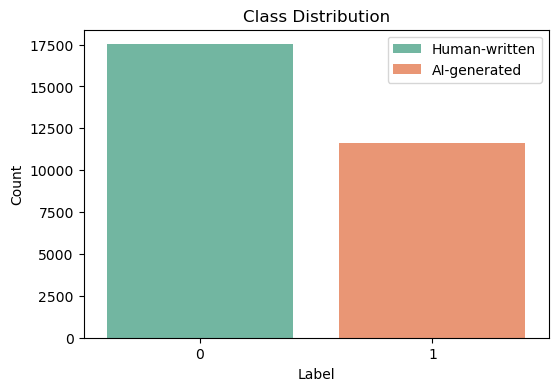

In [51]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='label', data=essays_df, hue='label', palette='Set2', dodge=False)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

plt.legend(labels=['Human-written', 'AI-generated'])

plt.show()

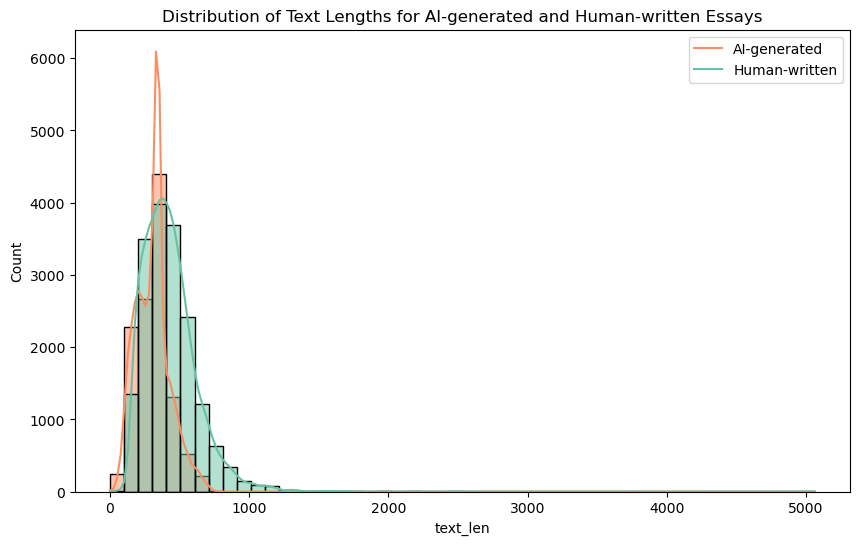

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=essays_df, x='text_len', hue='label', bins=50, kde=True, palette='Set2')
plt.title('Distribution of Text Lengths for AI-generated and Human-written Essays')
plt.legend(labels=['AI-generated', 'Human-written'])
plt.show()

In [53]:
essays_df['text_len'].describe().round(2)

count    29145.00
mean       382.48
std        183.09
min          1.00
25%        261.00
50%        350.00
75%        470.00
max       5061.00
Name: text_len, dtype: float64

In [54]:
essays_df.groupby('label')['text_len'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,17508.0,430.79,200.59,47.0,291.0,403.0,527.0,5061.0
1,11637.0,309.80,120.93,1.0,218.0,322.0,360.0,764.0


In [55]:
pip install wordcloud

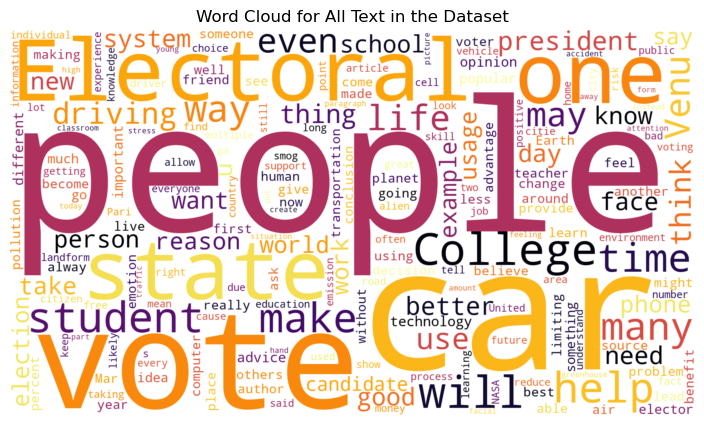

In [56]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

text_data = " ".join(essays_df['text'])
wordcloud = WordCloud(width=1920, height=1080, background_color='white', stopwords=stopwords, colormap='inferno', collocations=False).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Text in the Dataset')
plt.axis('off')
plt.show()

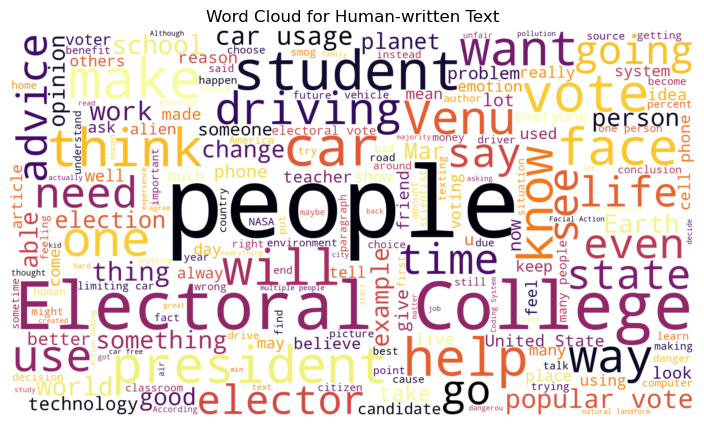

In [57]:
human_text_data = " ".join(essays_df[essays_df['label'] == 0]['text'])
wordcloud = WordCloud(width=1920, height=1080, background_color='white', stopwords=stopwords, colormap='inferno').generate(human_text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Human-written Text')
plt.axis('off')
plt.show()

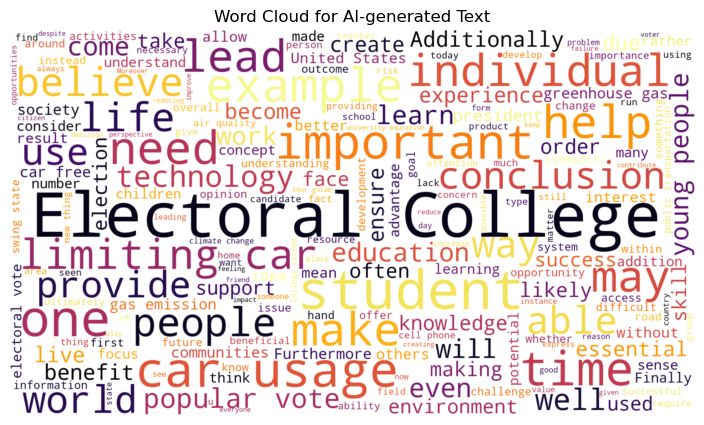

In [58]:
ai_text_data = " ".join(essays_df[essays_df['label'] == 1]['text'])
wordcloud = WordCloud(width=1920, height=1080, background_color='white', stopwords=stopwords, colormap='inferno').generate(ai_text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for AI-generated Text')
plt.axis('off')
plt.show()

### Naive Bayes

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

# Train and test splits
text_train, text_test, label_train, label_test = train_test_split(essays_df.text,
                                                                  essays_df.label,
                                                                  test_size=0.3,
                                                                  random_state=42)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS),
                                   ngram_range=(1, 8),
                                   max_features=1000,
                                   token_pattern=r'\b[^\d\W][^\d\W]+\b')

X_train = count_vectorizer.fit_transform(text_train.values)
X_test = count_vectorizer.transform(text_test.values)

In [60]:
X_train

<20401x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1420162 stored elements in Compressed Sparse Row format>

In [61]:
print(count_vectorizer.get_feature_names_out())

['ability' 'able' 'academic' 'access' 'accessible' 'accident' 'accidents'
 'according' 'achieve' 'act' 'action' 'action coding' 'active'
 'activities' 'activity' 'actually' 'addition' 'additionally' 'address'
 'adults' 'advantage' 'advantages' 'advantages limiting'
 'advantages limiting car' 'advantages limiting car usage' 'advice'
 'affect' 'age' 'ago' 'agree' 'air' 'air pollution' 'air quality' 'alien'
 'aliens' 'allow' 'allowed' 'allowing' 'allows' 'alot' 'alternative'
 'alternative transportation' 'america' 'american' 'americans' 'animals'
 'answer' 'appeal' 'approach' 'area' 'areas' 'aren' 'argue' 'argument'
 'arguments' 'art' 'article' 'ask' 'ask advice' 'asked' 'asking'
 'associated' 'atmosphere' 'attention' 'attitude' 'author' 'available'
 'average' 'avoid' 'aware' 'away' 'bad' 'balance' 'ban' 'banned' 'bans'
 'based' 'basic' 'begin' 'behavior' 'believe' 'beneficial' 'benefit'
 'benefits' 'best' 'best way' 'better' 'better choice' 'big' 'bigger'
 'bike' 'biking' 'body' 'bogota'

In [62]:
y_train = label_train
y_test = label_test
print(y_train.shape)
print(y_test.shape)

(20401,)
(8744,)


In [63]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [64]:
nb_y_pred_test = nb_classifier.predict(X_test)
nb_score_test = metrics.accuracy_score(y_test, nb_y_pred_test)
nb_conf_matrix = metrics.confusion_matrix(y_test, nb_y_pred_test, labels = [0, 1])

print(nb_score_test, "\n")
print(nb_conf_matrix,"\n")

nb_score_train = metrics.accuracy_score(y_train, nb_classifier.predict(X_train))

0.9573421774931381 

[[5139  145]
 [ 228 3232]] 



In [65]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
nb_cv_classifier = MultinomialNB()
nb_cv_classifier.fit(X_train, y_train)

MultinomialNB()

In [66]:
count_test_preds = cross_val_predict(nb_cv_classifier, X_test, y_test, cv=kf)
cv_test_scores = cross_val_score(nb_cv_classifier, X_test, y_test, cv=kf)
nb_cv_confmat_test = metrics.confusion_matrix(y_test, count_test_preds, labels = [0, 1])

print(metrics.accuracy_score(y_test, count_test_preds))
print(np.mean(cv_test_scores))
print(nb_cv_confmat_test)

0.9515096065873742
0.9515090022019773
[[5102  182]
 [ 242 3218]]


### Support Vector Machine

In [67]:
from sklearn import svm
svc_classifier = svm.SVC(kernel='linear', C=1)

svc_classifier.fit(X_train, y_train)
svc_y_pred_test = svc_classifier.predict(X_test)
svc_score_test = metrics.accuracy_score(y_test, svc_y_pred_test)
svc_conf_matrix = metrics.confusion_matrix(y_test, svc_y_pred_test, labels=[0, 1])

print(svc_score_test)
print(svc_conf_matrix)

0.9827310155535224
[[5205   79]
 [  72 3388]]


### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logres1_classifier = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', C=1, max_iter=1000) #l1?

logres1_classifier.fit(X_train, y_train)
logres1_y_pred_test = logres1_classifier.predict(X_test)
logres1_score_test = metrics.accuracy_score(y_test, logres1_y_pred_test)
logres1_conf_matrix = metrics.confusion_matrix(y_test, logres1_y_pred_test, labels=[0, 1])

print(logres1_score_test)
print(logres1_conf_matrix)

0.9877630375114365
[[5226   58]
 [  49 3411]]


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logres2_classifier = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto', C=1, max_iter=1000) #l1?

logres2_classifier.fit(X_train, y_train)
logres2_y_pred_test = logres2_classifier.predict(X_test)
logres2_score_test = metrics.accuracy_score(y_test, logres2_y_pred_test)
logres2_conf_matrix = metrics.confusion_matrix(y_test, logres2_y_pred_test, labels=[0, 1])

print(logres2_score_test)
print(logres2_conf_matrix)

0.9878774016468436
[[5227   57]
 [  49 3411]]


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
rf_y_pred_test = rf_classifier.predict(X_test)
rf_score_test = metrics.accuracy_score(y_test, rf_y_pred_test)
rf_conf_matrix = metrics.confusion_matrix(y_test, rf_y_pred_test, labels=[0, 1])

print(rf_score_test)
print(rf_conf_matrix)

0.9843321134492223
[[5254   30]
 [ 107 3353]]


## Multilayer Perceptron

In [71]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 2), random_state=1)
mlp.fit(X_train, y_train)
mlp_y_pred_test = mlp.predict(X_test)
mlp_score_test = metrics.accuracy_score(y_test, mlp_y_pred_test)
mlp_conf_matrix = metrics.confusion_matrix(y_test, mlp_y_pred_test, labels=[0, 1])

print(mlp_score_test)
print(mlp_conf_matrix)

0.9883348581884721
[[5232   52]
 [  50 3410]]


In [72]:
## 20 Epochs - Estimated Runtime: 3 mins
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Initialize MLPClassifier with 20 epochs (max_iter=60)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 2), random_state=1, max_iter=60)

# Lists to store loss, test accuracy, and train accuracy per epoch
loss_per_epoch = []
test_accuracy_per_epoch = []
train_accuracy_per_epoch = []

# Train the model for each epoch
for epoch in range(20):
    # Fit the model for the entire dataset
    mlp.fit(X_train, y_train)

    # Calculate loss
    loss = mlp.loss_
    loss_per_epoch.append(loss)

    # Make predictions on the test set
    mlp_y_pred_test = mlp.predict(X_test)

    # Calculate test accuracy
    test_accuracy = metrics.accuracy_score(y_test, mlp_y_pred_test)
    test_accuracy_per_epoch.append(test_accuracy)

    # Calculate train accuracy
    train_accuracy = mlp.score(X_train, y_train)
    train_accuracy_per_epoch.append(train_accuracy)

    # Print loss, test accuracy, and train accuracy per epoch
    print(f"Epoch {epoch + 1} - Loss: {loss}, Test Accuracy: {test_accuracy}, Train Accuracy: {train_accuracy}")

# Generate confusion matrix
mlp_conf_matrix = metrics.confusion_matrix(y_test, mlp_y_pred_test, labels=[0, 1])

# Print the final results
print("Final Accuracy Score:", test_accuracy)
print("Final Confusion Matrix:\n", mlp_conf_matrix)

Epoch 1 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 2 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 3 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 4 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 5 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 6 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 7 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 8 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 9 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 10 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 11 - Loss: 1.1913799115811549e-05, Test Acc

In [73]:
## 50 Epochs - Estimated Runtime: 7 mins
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Initialize MLPClassifier with 50 epochs (max_iter=60)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 2), random_state=1, max_iter=60)

# Lists to store loss, test accuracy, and train accuracy per epoch
loss_per_epoch = []
test_accuracy_per_epoch = []
train_accuracy_per_epoch = []

# Train the model for each epoch
for epoch in range(50):
    # Fit the model for the entire dataset
    mlp.fit(X_train, y_train)

    # Calculate loss
    loss = mlp.loss_
    loss_per_epoch.append(loss)

    # Make predictions on the test set
    mlp_y_pred_test = mlp.predict(X_test)

    # Calculate test accuracy
    test_accuracy = metrics.accuracy_score(y_test, mlp_y_pred_test)
    test_accuracy_per_epoch.append(test_accuracy)

    # Calculate train accuracy
    train_accuracy = mlp.score(X_train, y_train)
    train_accuracy_per_epoch.append(train_accuracy)

    # Print loss, test accuracy, and train accuracy per epoch
    print(f"Epoch {epoch + 1} - Loss: {loss}, Test Accuracy: {test_accuracy}, Train Accuracy: {train_accuracy}")

# Generate confusion matrix
mlp_conf_matrix = metrics.confusion_matrix(y_test, mlp_y_pred_test, labels=[0, 1])

# Print the final results
print("Final Accuracy Score:", test_accuracy)
print("Final Confusion Matrix:\n", mlp_conf_matrix)

Epoch 1 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 2 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 3 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 4 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 5 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 6 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 7 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 8 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 9 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 10 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 11 - Loss: 1.1913799115811549e-05, Test Acc

In [74]:
## 100 Epochs - Estimated Runtime: 14 mins
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Initialize MLPClassifier with 100 epochs (max_iter=60)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 2), random_state=1, max_iter=60)

# Lists to store loss, test accuracy, and train accuracy per epoch
loss_per_epoch = []
test_accuracy_per_epoch = []
train_accuracy_per_epoch = []

# Train the model for each epoch
for epoch in range(100):
    # Fit the model for the entire dataset
    mlp.fit(X_train, y_train)

    # Calculate loss
    loss = mlp.loss_
    loss_per_epoch.append(loss)

    # Make predictions on the test set
    mlp_y_pred_test = mlp.predict(X_test)

    # Calculate test accuracy
    test_accuracy = metrics.accuracy_score(y_test, mlp_y_pred_test)
    test_accuracy_per_epoch.append(test_accuracy)

    # Calculate train accuracy
    train_accuracy = mlp.score(X_train, y_train)
    train_accuracy_per_epoch.append(train_accuracy)

    # Print loss, test accuracy, and train accuracy per epoch
    print(f"Epoch {epoch + 1} - Loss: {loss}, Test Accuracy: {test_accuracy}, Train Accuracy: {train_accuracy}")

# Generate confusion matrix
mlp_conf_matrix = metrics.confusion_matrix(y_test, mlp_y_pred_test, labels=[0, 1])

# Print the final results
print("Final Accuracy Score:", test_accuracy)
print("Final Confusion Matrix:\n", mlp_conf_matrix)

Epoch 1 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 2 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 3 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 4 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 5 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 6 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 7 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 8 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 9 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 10 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 11 - Loss: 1.1913799115811549e-05, Test Acc

Epoch 87 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 88 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 89 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 90 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 91 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 92 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 93 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 94 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 95 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 96 - Loss: 1.1913799115811549e-05, Test Accuracy: 0.9883348581884721, Train Accuracy: 1.0
Epoch 97 - Loss: 1.1913799115811549e-05,

### Plots

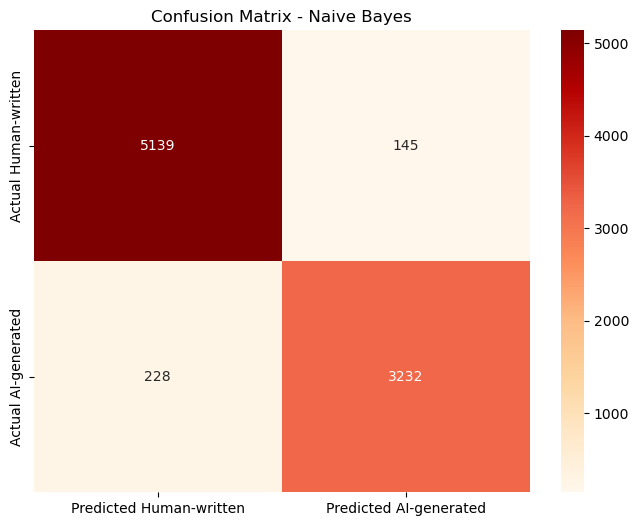

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="OrRd", cbar=True,
            xticklabels=['Predicted Human-written', 'Predicted AI-generated'],
            yticklabels=['Actual Human-written', 'Actual AI-generated'])
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

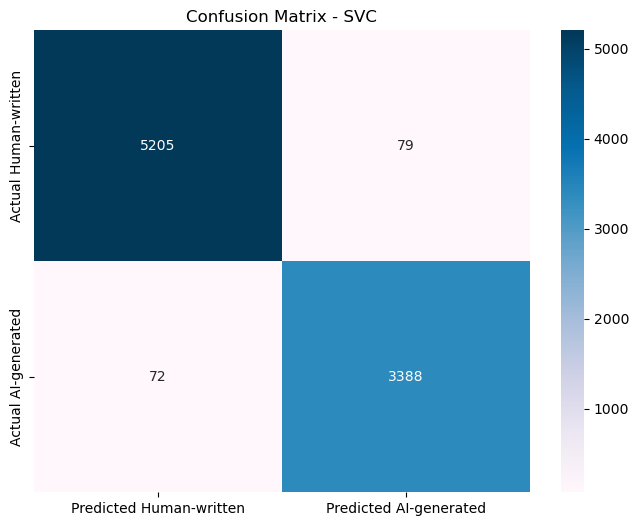

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt="d", cmap="PuBu", cbar=True,
            xticklabels=['Predicted Human-written', 'Predicted AI-generated'],
            yticklabels=['Actual Human-written', 'Actual AI-generated'])
plt.title('Confusion Matrix - SVC')
plt.show()

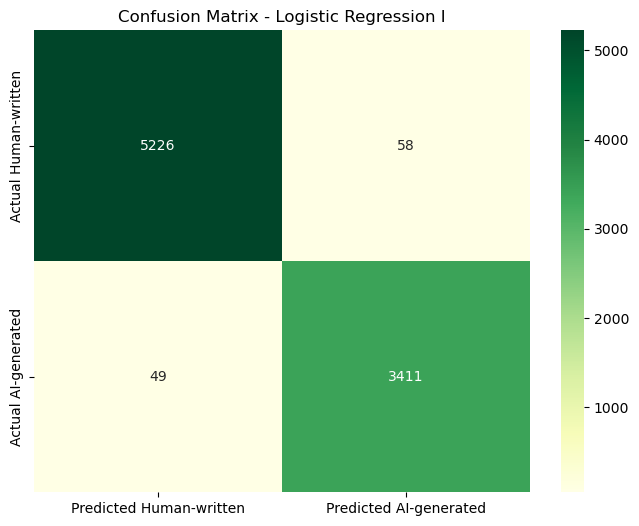

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
sns.heatmap(logres1_conf_matrix, annot=True, fmt="d", cmap="YlGn", cbar=True,
            xticklabels=['Predicted Human-written', 'Predicted AI-generated'],
            yticklabels=['Actual Human-written', 'Actual AI-generated'])
plt.title('Confusion Matrix - Logistic Regression I')
plt.show()

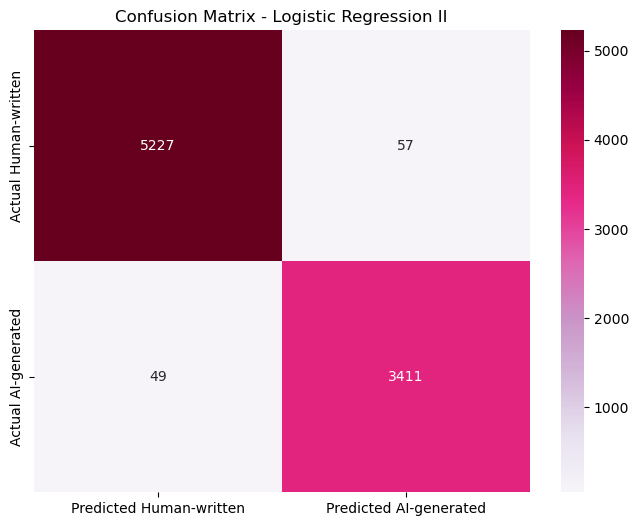

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
sns.heatmap(logres2_conf_matrix, annot=True, fmt="d", cmap="PuRd", cbar=True,
            xticklabels=['Predicted Human-written', 'Predicted AI-generated'],
            yticklabels=['Actual Human-written', 'Actual AI-generated'])
plt.title('Confusion Matrix - Logistic Regression II')
plt.show()

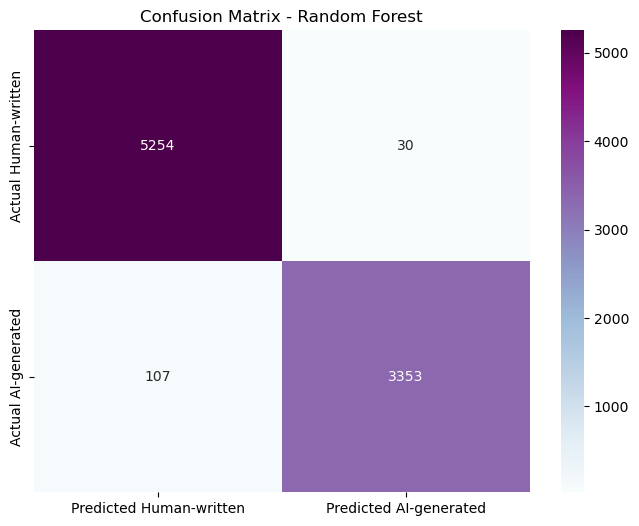

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="BuPu", cbar=True,
            xticklabels=['Predicted Human-written', 'Predicted AI-generated'],
            yticklabels=['Actual Human-written', 'Actual AI-generated'])
plt.title('Confusion Matrix - Random Forest')
plt.show()

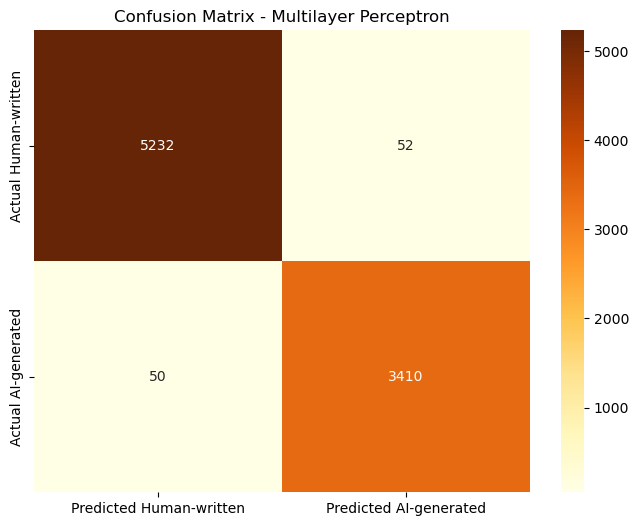

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt="d", cmap="YlOrBr", cbar=True,
            xticklabels=['Predicted Human-written', 'Predicted AI-generated'],
            yticklabels=['Actual Human-written', 'Actual AI-generated'])
plt.title('Confusion Matrix - Multilayer Perceptron')
plt.show()

In [81]:
from sklearn.metrics import classification_report

nb_classification_report = classification_report(y_test, nb_y_pred_test)
print(nb_classification_report, "\n")

svc_classification_report = classification_report(y_test, svc_y_pred_test)
print(svc_classification_report, "\n")

logres1_classification_report = classification_report(y_test, logres1_y_pred_test)
print(logres1_classification_report, "\n")

logres2_classification_report = classification_report(y_test, logres2_y_pred_test)
print(logres2_classification_report, "\n")

rf_classification_report = classification_report(y_test, rf_y_pred_test)
print(rf_classification_report, "\n")

mlp_classification_report = classification_report(y_test, mlp_y_pred_test)
print(mlp_classification_report, "\n")

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5284
           1       0.96      0.93      0.95      3460

    accuracy                           0.96      8744
   macro avg       0.96      0.95      0.96      8744
weighted avg       0.96      0.96      0.96      8744
 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5284
           1       0.98      0.98      0.98      3460

    accuracy                           0.98      8744
   macro avg       0.98      0.98      0.98      8744
weighted avg       0.98      0.98      0.98      8744
 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5284
           1       0.98      0.99      0.98      3460

    accuracy                           0.99      8744
   macro avg       0.99      0.99      0.99      8744
weighted avg       0.99      0.99      0.99      8744
 

             

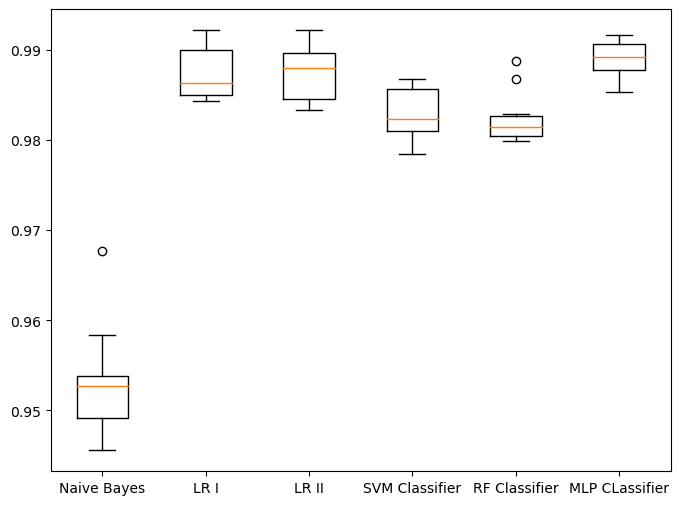

In [82]:
models = {"Naive Bayes": MultinomialNB(),
          "LR I": LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', C=1, max_iter=1000),
          "LR II":LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto', C=1, max_iter=1000),
          "SVM Classifier": svm.SVC(kernel='linear', C=1),
          "RF Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
          "MLP CLassifier": mlp
          }
results = []

for model in models.values():
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)

plt.figure(figsize=(8,6))
plt.boxplot(results, labels=models.keys())
plt.show()

In [83]:
means = [np.mean(arr) for arr in results]

print(means)

[0.9530907090910837, 0.9873536857173051, 0.9873046420920157, 0.9828440739353065, 0.9823538538394289, 0.989020208279294]


In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

NB AUC score: 0.9533313569593889


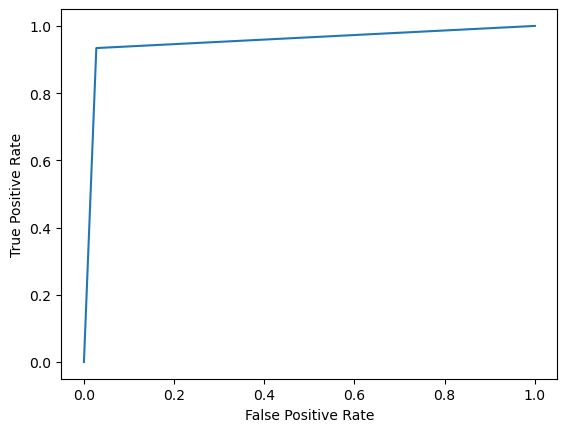

In [85]:
plot_roc_curve(y_test, nb_y_pred_test)
print(f'NB AUC score: {roc_auc_score(y_test, nb_y_pred_test)}')

SVC AUC score: 0.982119978296351


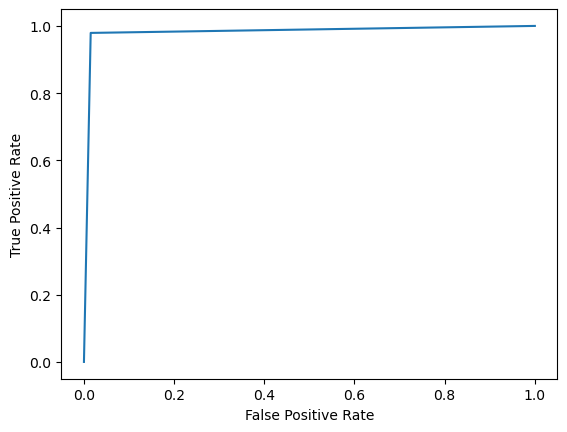

In [86]:
plot_roc_curve(y_test, svc_y_pred_test)
print(f'SVC AUC score: {roc_auc_score(y_test, svc_y_pred_test)}')

LR I AUC score: 0.9874308086797093


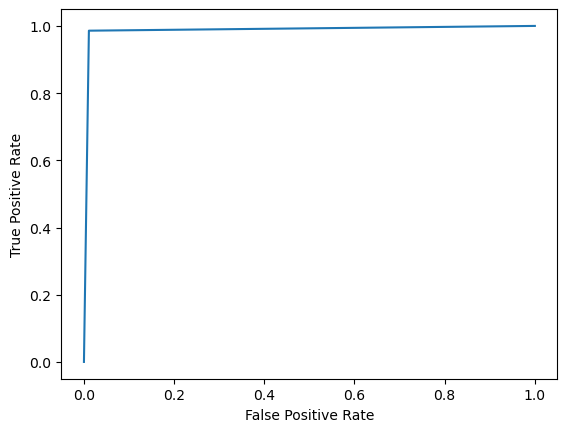

In [87]:
plot_roc_curve(y_test, logres1_y_pred_test)
print(f'LR I AUC score: {roc_auc_score(y_test, logres1_y_pred_test)}')

LR II AUC score: 0.9875254339635852


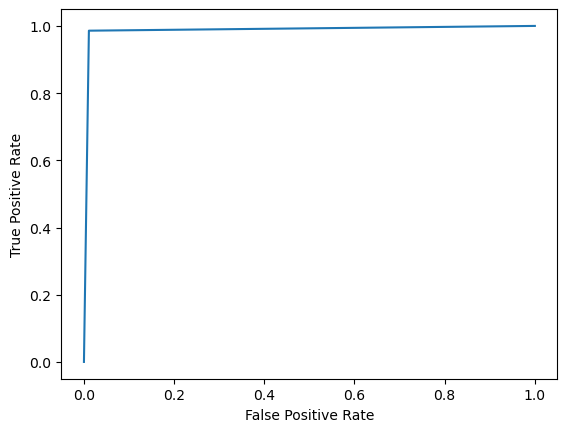

In [88]:
plot_roc_curve(y_test, logres1_y_pred_test)
print(f'LR II AUC score: {roc_auc_score(y_test, logres2_y_pred_test)}')

RF AUC score: 0.9816988137380597


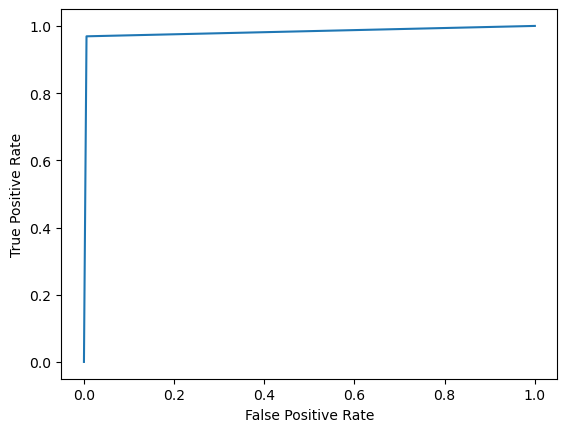

In [89]:
plot_roc_curve(y_test, rf_y_pred_test)
print(f'RF AUC score: {roc_auc_score(y_test, rf_y_pred_test)}')

MLP AUC score: 0.9878540517124442


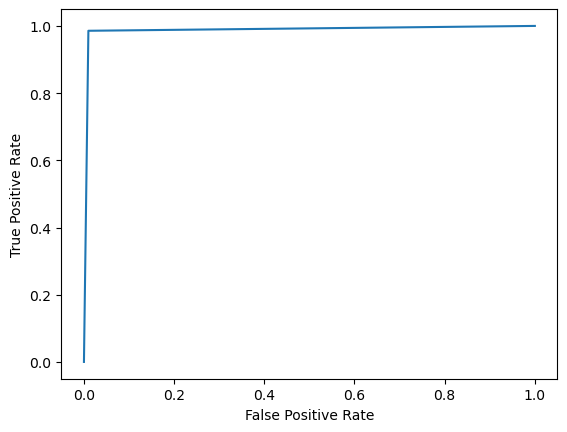

In [90]:
plot_roc_curve(y_test, mlp_y_pred_test)
print(f'MLP AUC score: {roc_auc_score(y_test, mlp_y_pred_test)}')